In [ ]:
#Importe
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

#Datenset laden 
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df


,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [41]:
#Funktion zur Erkennung von Ausreißern 
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

#Ausreißer durch NaN ersetzen
diabetes_cleaned = diabetes_df.copy()

for col in diabetes_cleaned.columns[:-1]:  
    outliers = detect_outliers_iqr(diabetes_cleaned[col])
    diabetes_cleaned.loc[outliers, col] = np.nan

#Nullen durch NaN ersetzen
cols_with_invalid_zeros = ["plas", "pres", "skin", "insu", "mass"]
for col in cols_with_invalid_zeros:
    diabetes_cleaned[col] = diabetes_cleaned[col].replace(0, np.nan)

#Entfernen von Reihen mit NaN Werten
diabetes_complete = diabetes_cleaned.dropna()

#Ausgabe
diabetes_complete.shape, diabetes_complete.head()
diabetes_complete


,preg,plas,pres,skin,insu,mass,pedi,age,class
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,tested_negative
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,tested_positive
14,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0,tested_positive
16,0.0,118.0,84.0,47.0,230.0,45.8,0.551,31.0,tested_positive
19,1.0,115.0,70.0,30.0,96.0,34.6,0.529,32.0,tested_positive
...,...,...,...,...,...,...,...,...,...
751,1.0,121.0,78.0,39.0,74.0,39.0,0.261,28.0,tested_negative
755,1.0,128.0,88.0,39.0,110.0,36.5,1.057,37.0,tested_positive
760,2.0,88.0,58.0,26.0,16.0,28.4,0.766,22.0,tested_negative
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,tested_negative


In [42]:
#Vorbereitung
X_features = diabetes_complete.drop(columns=["class"])
y_target = diabetes_complete["class"]

#Codierung in numerische Werte
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_target)

#Chi-Quadrat 
chi2_scores, p_values = chi2(X_features, y_encoded)

#Data Frame 
feature_ranking = pd.DataFrame({
    "Feature": X_features.columns,
    "Chi2 Score": chi2_scores,
    "p-value": p_values
}).sort_values(by="Chi2 Score", ascending=False)

feature_ranking


,Feature,Chi2 Score,p-value
4,insu,1482.629847,0.000000e+00
1,plas,638.061416,8.821752e-141
7,age,121.159107,3.526816e-28
0,preg,59.943455,9.762210e-15
3,skin,52.820866,3.653986e-13
2,pres,26.006236,3.403163e-07
5,mass,21.865047,2.925139e-06
6,pedi,1.583186,2.083024e-01


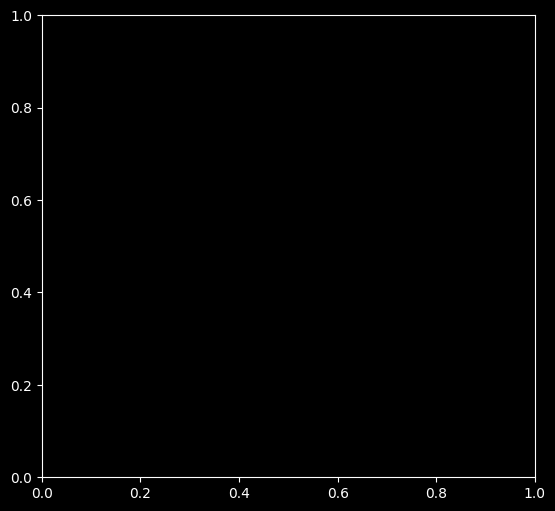

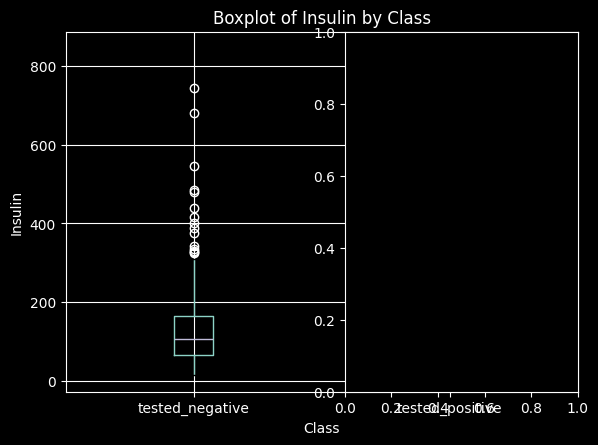

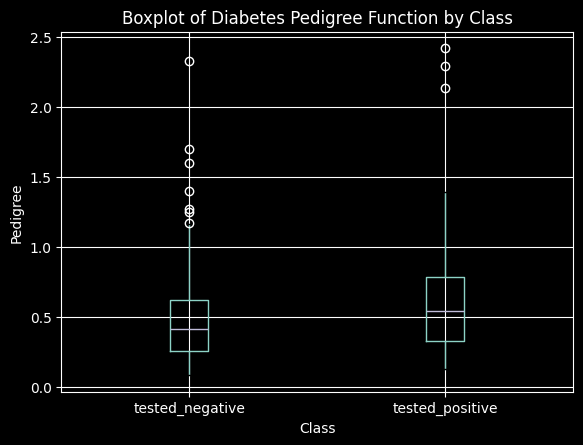

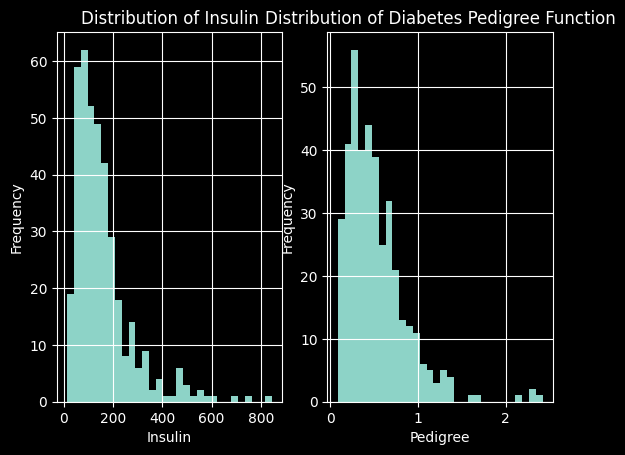

In [45]:
#Null-Werte ersetzen (invalid zeros in bestimmten Spalten)
cols_with_invalid_zeros = ["plas", "pres", "skin", "insu", "mass"]
for col in cols_with_invalid_zeros:
    diabetes_df[col] = diabetes_df[col].replace(0, pd.NA)

#Nur vollständige Fälle auswählen
diabetes_complete = diabetes_df.dropna()

#Boxplots erstellen
plt.figure(figsize=(14, 6))

#Insulin Boxplot (höchste Chi²/IG)
plt.subplot(1, 2, 1)
diabetes_complete.boxplot(column="insu", by="class")
plt.title("Boxplot of Insulin by Class")
plt.xlabel("Class")
plt.ylabel("Insulin")
plt.suptitle("") 

#Pedigree Boxplot (niedrigste Chi²/IG)
plt.subplot(1, 2, 2)
diabetes_complete.boxplot(column="pedi", by="class")
plt.title("Boxplot of Diabetes Pedigree Function by Class")
plt.xlabel("Class")
plt.ylabel("Pedigree")
plt.suptitle("")

plt.show()

#Verteilungsplots (Histogramme)

#Insulin Histogramm
plt.subplot(1, 2, 1)
diabetes_complete["insu"].hist(bins=30)
plt.title("Distribution of Insulin")
plt.xlabel("Insulin")
plt.ylabel("Frequency")

#Pedigree Histogramm
plt.subplot(1, 2, 2)
diabetes_complete["pedi"].hist(bins=30)
plt.title("Distribution of Diabetes Pedigree Function")
plt.xlabel("Pedigree")
plt.ylabel("Frequency")

plt.show()
